In [2]:
from qiskit import *

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

with open("ibmapi.txt", "r") as f:
    token = f.read().strip()

QiskitRuntimeService.save_account(
    token=token,
    instance="Practice",
    set_as_default=True,
    overwrite=True  # Allow overwriting the existing account
)

service = QiskitRuntimeService()


In [4]:
from qiskit_aer import Aer

In [5]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [6]:
provider = service.backends()

In [7]:
provider

[<IBMBackend('ibm_torino')>, <IBMBackend('ibm_brisbane')>]

In [8]:
for backend in provider:
    name = backend.name
    qubits = backend.num_qubits
    status = backend.status().operational
    pending_jobs = backend.status().pending_jobs
    print(f"Backend: {name}, Qubits: {qubits}, Operational: {status}, Pending Jobs: {pending_jobs}")

Backend: ibm_torino, Qubits: 133, Operational: True, Pending Jobs: 5295
Backend: ibm_brisbane, Qubits: 127, Operational: True, Pending Jobs: 2099


In [9]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

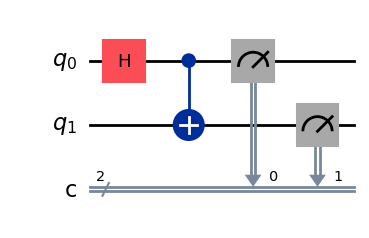

In [10]:
# %inline matplotlib

qc.draw(output='mpl')

In [11]:
job = Aer.get_backend('qasm_simulator').run(qc, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 547, '00': 477}


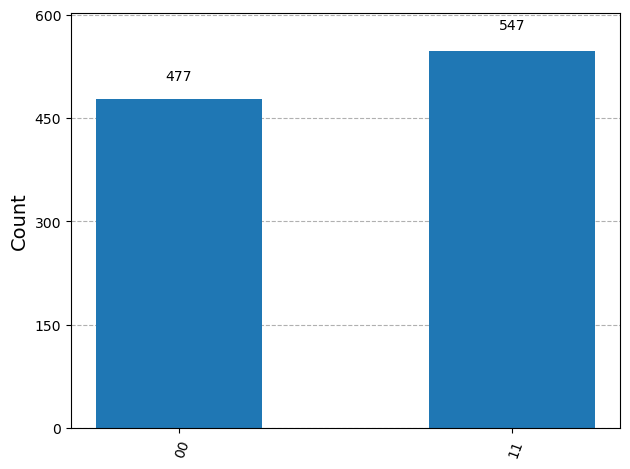

In [12]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)


In [13]:
backend = service.backend("ibm_brisbane")

IBM Quantum now requires you to transpile your circuit for the backend before running it.

Solution:
Transpile your circuit for the backend using Qiskit’s ‎`transpile` function.

In [14]:
from qiskit import transpile
transpiled_qc = transpile(qc, backend=backend)

`backend.run()` is no longer supported in the latest Qiskit IBM Runtime API.
You now need to use the Qiskit Primitives interface (`Sampler` for measurement counts,`Estimator` for expectation values).

 `Sampler` returns quasi-probabilities, which are similar to counts but may include negative values due to error mitigation. For most simple circuits, they closely resemble actual counts.
 • If you want to run multiple circuits, pass a list: `circuits=[qc1, qc2, ...]`.

In [ ]:
from qiskit_ibm_runtime import Sampler

sampler = Sampler(backend)
# You need to pass a list of circuits to `sampler.run()`, even if you have only one circuit.

job = sampler.run([transpiled_qc], shots=1024)


In [18]:
result = job.result()
result

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-08-26 14:46:30', stop='2025-08-26 14:46:31', size=1024>)])}, 'version': 2})

In [22]:
result[0].data

DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>))

In [21]:
# these are the bit values from the alpha register, over all shots
bitvals = result[0].data.alpha
# we can use it to generate a Counts mapping, which is similar to a quasi prob distribution
counts = bitvals.get_counts()
# which can in turn be converted to the V1 type through normalization
quasi_dist = QuasiDistribution({outcome: freq / shots for outcome, freq in counts.items()})

AttributeError: 'DataBin' object has no attribute 'alpha'